In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-kaf0ffua because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
df_patients = pd.read_csv('data/diabetic_data_processed.csv')
df_patients.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,med_always_changed,med_ever_changed,avg_times_diabetic_med_prescribed,num_times_diabetic_med_prescribed,diabetic_med_always_prescribed,diabetic_med_ever_prescribed,avg_times_readmitted,num_times_readmitted,always_readmitted,ever_readmitted
0,135,Caucasian,Female,[50-60),Emergency,Home,Emergency Room,3,Other,31,...,1,1,1.0,2,1,1,0.5,1,0,1
1,378,Caucasian,Female,[50-60),Elective,Home,Physician Referral,2,Other,49,...,0,0,0.0,0,0,0,0.0,0,0,0
2,729,Caucasian,Female,[80-100),Emergency,SNF,Emergency Room,4,InternalMedicine,68,...,0,0,1.0,1,1,1,0.0,0,0,0
3,774,Caucasian,Female,[80-100),Emergency,Home,Emergency Room,3,InternalMedicine,46,...,1,1,1.0,1,1,1,0.0,0,0,0
4,927,AfricanAmerican,Female,[0-50),Emergency,Home,Emergency Room,5,InternalMedicine,49,...,0,0,1.0,1,1,1,0.0,0,0,0


In [4]:
pd.set_option('display.max_rows', None)
df_patients.dtypes

patient_nbr                            int64
race                                  object
gender                                object
age                                   object
admission_type_id                     object
discharge_disposition_id              object
admission_source_id                   object
time_in_hospital                       int64
medical_specialty                     object
num_lab_procedures                     int64
num_procedures                         int64
num_medications                        int64
number_outpatient                      int64
number_emergency                       int64
number_inpatient                       int64
diag_1                                object
diag_2                                object
diag_3                                object
number_diagnoses                       int64
max_glu_serum                         object
A1Cresult                             object
metformin                             object
repaglinid

In [5]:
readmittance_rate = df_patients['readmitted'].value_counts(normalize=True)[1]

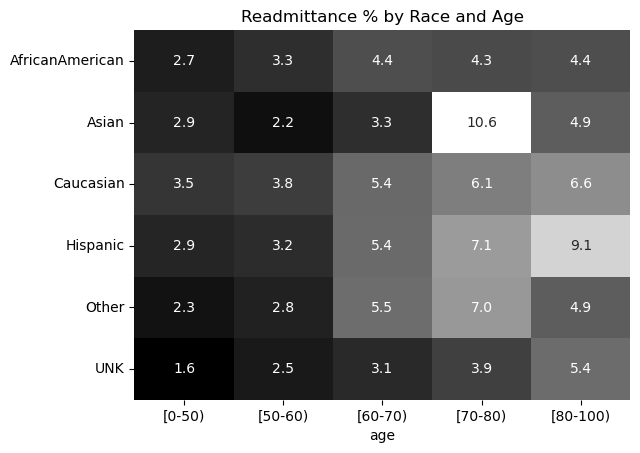

In [47]:
table = df_patients.pivot_table(index="race", columns="age", values="readmitted", aggfunc="mean").apply(lambda x:x*100)
ax = sns.heatmap(table,cmap='gray',annot=True,fmt='.1f',cbar=None)
ax.set_ylabel('');
ax.set_title('Readmittance % by Race and Age');

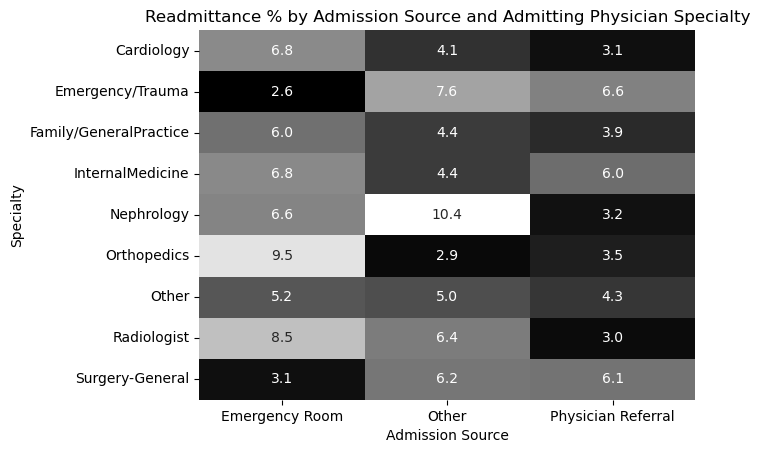

In [56]:
table = df_patients.pivot_table(index="medical_specialty", columns="admission_source_id", values="readmitted", aggfunc="mean").apply(lambda x:x*100)
ax = sns.heatmap(table,cmap='gray',annot=True,fmt='.1f',cbar=None)
ax.set_ylabel('');
ax.set_title('Readmittance % by Admission Source and Admitting Physician Specialty')
ax.set_ylabel('Specialty')
ax.set_xlabel('Admission Source');

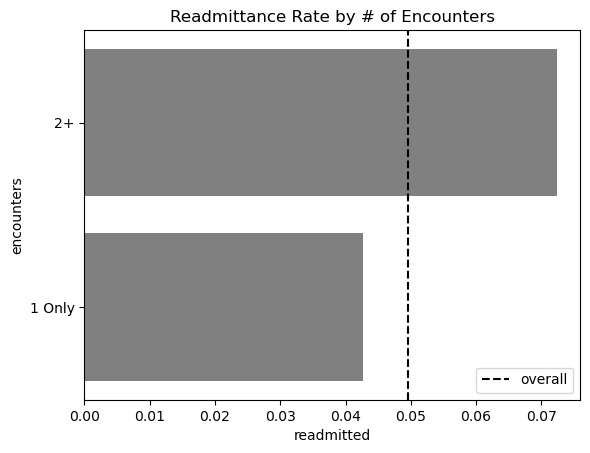

In [6]:
df_patients['encounters']=df_patients.num_encounters.apply(lambda v: '2+' if v>1 else '1 Only')
ax = sns.barplot(data=df_patients,y='encounters',x='readmitted',color='gray', errorbar=None)
ax.axvline(x=readmittance_rate,color='black',linestyle='--',label='overall')
ax.set_title('Readmittance Rate by # of Encounters')
ax.legend();

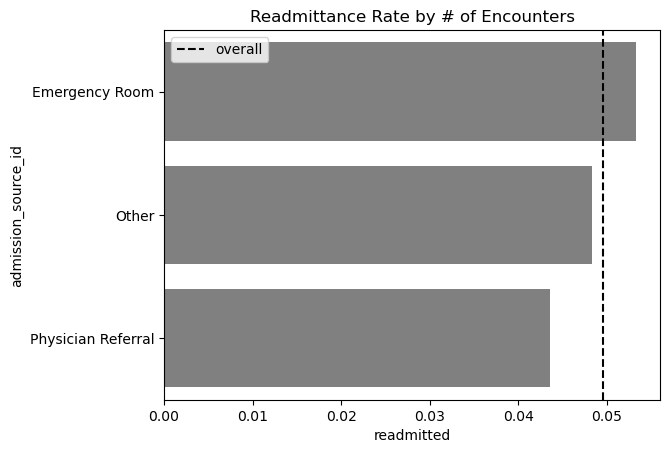

In [65]:

ax = sns.barplot(data=df_patients,y='admission_source_id',x='readmitted',color='gray', errorbar=None,
                order=['Emergency Room', 'Other','Physician Referral'])
ax.axvline(x=readmittance_rate,color='black',linestyle='--',label='overall')
ax.set_title('Readmittance Rate by # of Encounters')
ax.legend();

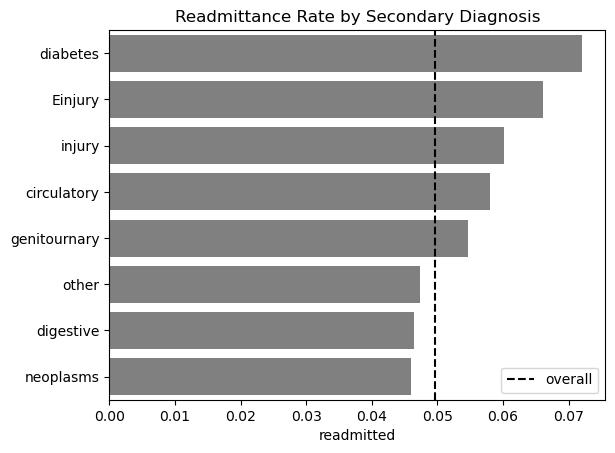

In [52]:
ax = sns.barplot(data=df_patients,y='diag_3',x='readmitted',color='gray', errorbar=None,
                 order=['diabetes','Einjury','injury','circulatory','genitournary','other',
                        'digestive','neoplasms'])
ax.axvline(x=readmittance_rate,color='black',linestyle='--',label='overall')
ax.set_title('Readmittance Rate by Secondary Diagnosis')
ax.set_ylabel('')
ax.legend();

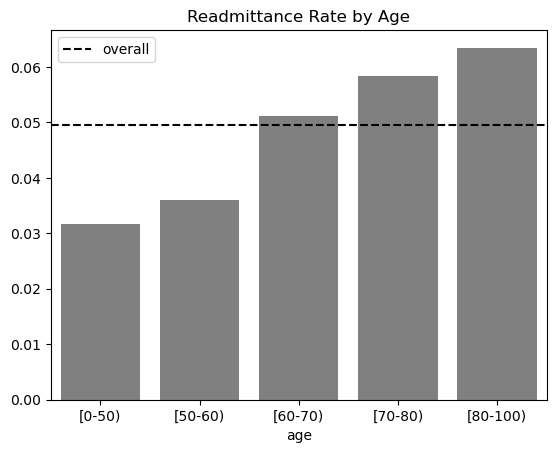

In [70]:
ax = sns.barplot(data=df_patients,x='age',y='readmitted',color='gray', errorbar=None,
                order=['[0-50)','[50-60)','[60-70)','[70-80)','[80-100)'])
ax.axhline(y=readmittance_rate,color='black',linestyle='--',label='overall')
ax.set_title('Readmittance Rate by Age')
ax.set_ylabel('')
ax.legend();

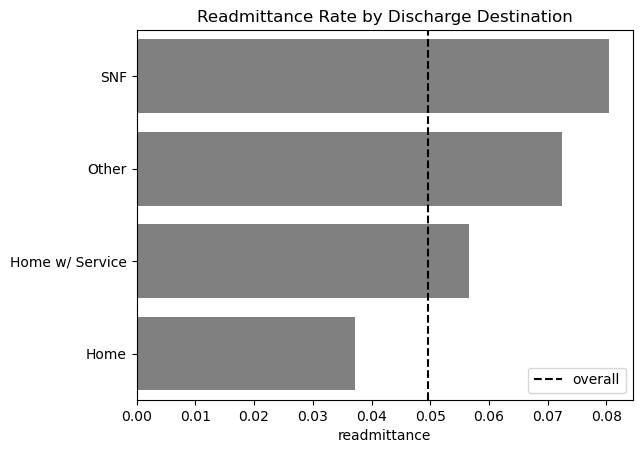

In [12]:

ax = sns.barplot(data=df_patients,y='discharge_disposition_id',x='readmitted',color='gray', errorbar=None,
                order=['SNF','Other','Home w/ Service','Home'])
ax.axvline(x=readmittance_rate,color='black',linestyle='--',label='overall')
ax.set_title('Readmittance Rate by Discharge Destination')
ax.set_xlabel('readmittance')
ax.set_ylabel('')
ax.legend();

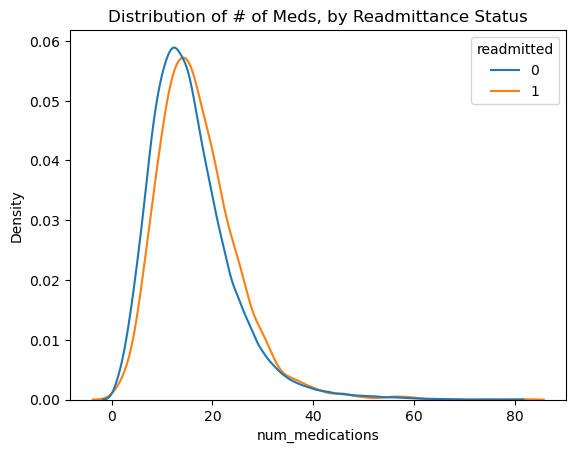

In [71]:
sns.kdeplot(data=df_patients,x='num_medications',hue='readmitted',common_norm=False).set_title('Distribution of # of Meds, by Readmittance Status');

<Axes: xlabel='num_lab_procedures', ylabel='Density'>

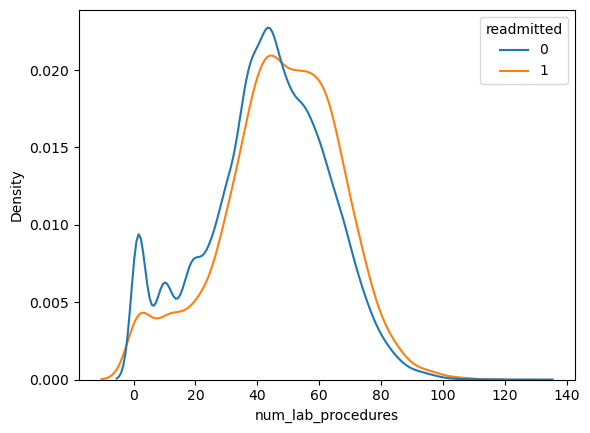

In [25]:
sns.kdeplot(data=df_patients,x='num_lab_procedures',hue='readmitted',common_norm=False)

<Axes: xlabel='num_medications', ylabel='Density'>

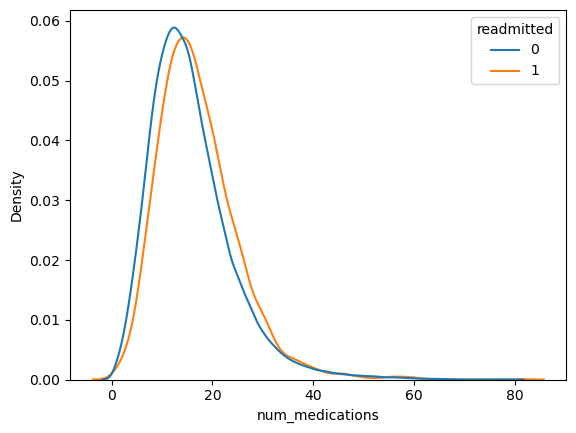

In [26]:
sns.kdeplot(data=df_patients,x='num_medications',hue='readmitted',common_norm=False)

<Axes: xlabel='avg_time_in_hospital', ylabel='Density'>

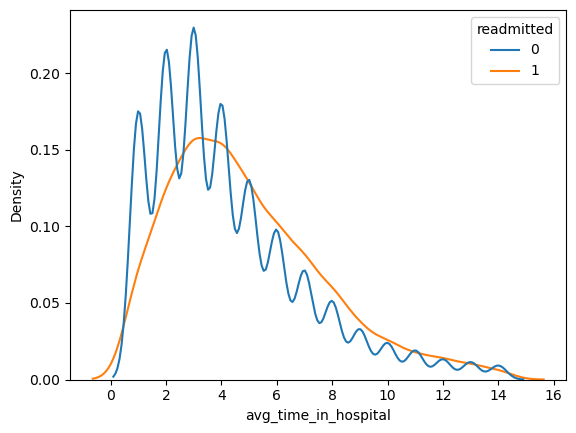

In [32]:
sns.kdeplot(data=df_patients,x='avg_time_in_hospital',hue='readmitted',common_norm=False)

<Axes: xlabel='max_time_in_hospital', ylabel='Density'>

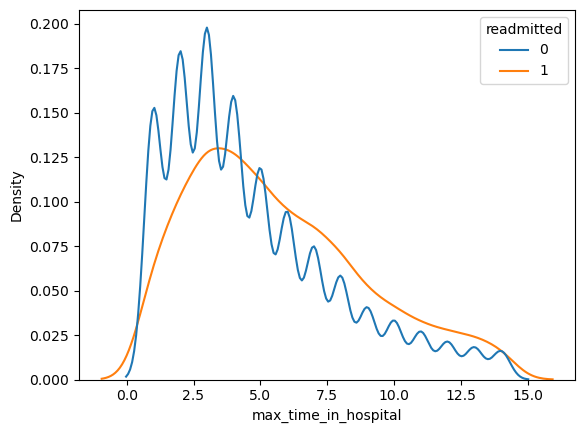

In [34]:
sns.kdeplot(data=df_patients,x='max_time_in_hospital',hue='readmitted',common_norm=False)

In [3]:
df_patients.readmitted.value_counts(normalize=True)*100

readmitted
0    95.043578
1     4.956422
Name: proportion, dtype: float64